In [2]:
import numpy as np
import pandas as pd

In [3]:
d = pd.read_csv('pca_data.csv', header = None)

In [4]:
d.head(3)

,0,1
0,2.5,2.4
1,0.5,0.7
2,2.2,2.9


In [5]:
d_np = d.values

In [6]:
d_np

array([[2.5, 2.4],
       [0.5, 0.7],
       [2.2, 2.9],
       [1.9, 2.2],
       [3.1, 3. ],
       [2.3, 2.7],
       [2. , 1.6],
       [1. , 1.1],
       [1.5, 1.6],
       [1.1, 0.9]])

## 평균 중심화 (mean centering) 하기

PCA에서는 원데이터를 그대로 사용하지 않고, 각 feature에 대해서 mean centering 해준 값을 사용한다.

In [24]:
m = d_np.mean(axis = 0) # get mean of each column

In [25]:
m

array([1.81, 1.91])

In [26]:
centered_d = d_np - m

In [27]:
centered_d

array([[ 0.69,  0.49],
       [-1.31, -1.21],
       [ 0.39,  0.99],
       [ 0.09,  0.29],
       [ 1.29,  1.09],
       [ 0.49,  0.79],
       [ 0.19, -0.31],
       [-0.81, -0.81],
       [-0.31, -0.31],
       [-0.71, -1.01]])

## 공분산 행렬 구하기

In [28]:
cov_m = np.cov(centered_d.T)

In [29]:
cov_m

array([[0.61655556, 0.61544444],
       [0.61544444, 0.71655556]])

원 데이터가 가지고 있는 전체 분산은 각 feature의 분산의 합

In [16]:
np.trace(cov_m)

1.3331111111111111

# 고유값과 고유벡터 구하기

In [17]:
eigvalues, eigvectors = np.linalg.eig(cov_m)

In [18]:
eigvalues

array([0.0490834 , 1.28402771])

In [15]:
np.sum(eigvalues)#1.28402771+0.0490834

1.3331111111111111

In [19]:
1.28402771/(1.28402771+0.0490834)

0.9631813135215713

In [16]:
eigvectors # It is important to notice that these eigenvectors are both unit eigenvectors ie. their lengths are both 1.

array([[-0.73517866, -0.6778734 ],
       [ 0.6778734 , -0.73517866]])

In [20]:
eigvectors[:,0]  # 고유값 0.0490834에 대한 고유벡터

array([-0.73517866,  0.6778734 ])

In [21]:
eigvectors[:,1] # 고유값 1.28402771에 대한 고유벡터

array([-0.6778734 , -0.73517866])

In [23]:
# 두 고유벡터는 서로 수직 => 따라서 내적값 = 0
np.dot(eigvectors[:,0], eigvectors[:,1])

0.0

In [22]:
# 내적값 = 0 이라는 것은 코사인의 값이 0이라는 것을 의미
np.dot(eigvectors[:,0], eigvectors[:,1])/(np.linalg.norm(eigvectors[:,0])*np.linalg.norm(eigvectors[:,1]))

0.0

## 시각화 해 보기

In [30]:
import matplotlib.pyplot as plt

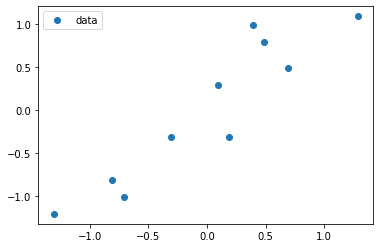

In [31]:
plt.plot(centered_d[:, 0], centered_d[:, 1], 'o', label = 'data')
plt.legend()
plt.show()

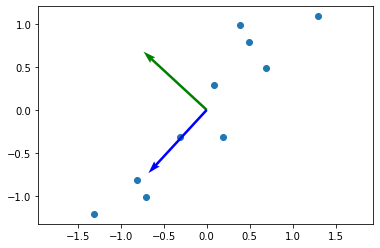

In [32]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(centered_d[:, 0], centered_d[:, 1]) 
ax.quiver((0,0), (0,0), eigvectors[0,:], eigvectors[1,:],color=['g','b'], units = 'xy', scale = 1)
# quiver가 작동하는 방식 참고
# https://stackoverflow.com/questions/42281966/how-to-plot-vectors-in-python-using-matplotlib
plt.axis('equal')
plt.show()

In [21]:
eigvectors

array([[-0.73517866, -0.6778734 ],
       [ 0.6778734 , -0.73517866]])

In [27]:
eigvectors[:,0] 
# 위에서 초록색을 의미

array([-0.73517866,  0.6778734 ])

In [28]:
eigvectors[:,1]
# 위에서 파란색을 의미

array([-0.6778734 , -0.73517866])

## PC를 사용해서 새로운 데이터 구축하기

component를 하나만 사용하는 경우

In [42]:
F = eigvectors[:,1]

In [43]:
F

array([-0.6778734 , -0.73517866])

In [31]:
F.shape

(2,)

In [41]:
centered_d

array([[ 0.69,  0.49],
       [-1.31, -1.21],
       [ 0.39,  0.99],
       [ 0.09,  0.29],
       [ 1.29,  1.09],
       [ 0.49,  0.79],
       [ 0.19, -0.31],
       [-0.81, -0.81],
       [-0.31, -0.31],
       [-0.71, -1.01]])

In [32]:
new_data = np.dot(centered_d, F)

In [33]:
new_data

array([-0.82797019,  1.77758033, -0.99219749, -0.27421042, -1.67580142,
       -0.9129491 ,  0.09910944,  1.14457216,  0.43804614,  1.22382056])

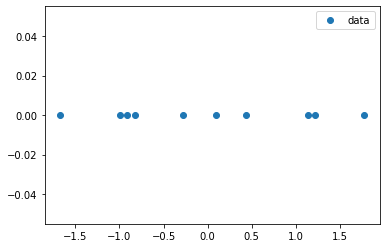

In [35]:
plt.plot(new_data,np.zeros(10), 'o', label = 'data')
plt.legend()
plt.show()

## sklearn의 PCA 클래스 사용하기

In [33]:
from sklearn.decomposition import PCA

In [34]:
pca = PCA(n_components=1)

In [40]:
pca.fit_transform(d_np)

array([[-0.82797019],
       [ 1.77758033],
       [-0.99219749],
       [-0.27421042],
       [-1.67580142],
       [-0.9129491 ],
       [ 0.09910944],
       [ 1.14457216],
       [ 0.43804614],
       [ 1.22382056]])

In [36]:
pca.fit_transform(centered_d)

array([[-0.82797019],
       [ 1.77758033],
       [-0.99219749],
       [-0.27421042],
       [-1.67580142],
       [-0.9129491 ],
       [ 0.09910944],
       [ 1.14457216],
       [ 0.43804614],
       [ 1.22382056]])

In [41]:
pca.explained_variance_

array([1.28402771])

In [42]:
eigvalues[1]

1.2840277121727837

In [43]:
pca.explained_variance_ratio_

array([0.96318131])